# Part I - (Students Pefromance Dataset)
## by (Mehdi RABBAI)

## Introduction


## Preliminary Wrangling


In [205]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
!pip install -U seaborn
%matplotlib inline

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.2)


In [206]:
students = pd.read_csv("StudentsDatasetPerformance.csv")


In [207]:
print(students.shape)
print(students.dtypes)
students.columns

(1000, 8)
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [208]:
students.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74


In [209]:
students['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [210]:
students['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [211]:
#No missing data
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [212]:
#NO duplicated values
students.duplicated().sum()

0

In [213]:
students.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Feature Engineering

* The dataset contains differents scores for math, reading, writing, I will derive 2 features from these scores
> **Percentange** and **Grade**

Percentange will be calculated as followed: __math_score + reading_score + writing_score / 3__

Score will be based on the [Academic grading in the US](https://en.wikipedia.org/wiki/Academic_grading_in_the_United_States)


| Letter Grade 	| Percentage 	| GPA 	|
|:------------:	|:----------:	|:---:	|
| A            	| 90–100%    	| 4.0 	|
| B            	| 80–89%     	| 3.0 	|
| C            	| 70–79%     	| 2.0 	|
| D            	| 60–69%     	| 1.0 	|
| F            	| 0–59%      	| 0.0 	|



In [214]:
students['Percentage'] = round((students['reading score'] + students['writing score'] + students['math score']) / 3, 2)

In [215]:
def Grade(percentage):
    if percentage >= 90: return "A"
    if percentage > 79 : return "B"
    if percentage > 69 : return "C"
    if percentage > 59 : return "D"
    else: return "F"

students["Grade"] = students['Percentage'].apply(lambda x: Grade(x))

In [216]:
students.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,C


### What is the structure of your dataset?
> There are 1000 observations in the dataset with 10 features ('gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course', 'math score', 'reading score','writing score','Percentage','Grade'). 
Some variables are numeric in nature ('math score', 'reading score','writing score'), some are categorical('gender', 'race/ethnicity', 'lunch') but the variable `parental level of education` & `Grade` are ordered factor variables with the following levels.

(low) ——> (high)

parental level of education: some high school, high school, some college, associate's degree, bachelor's degree, master's degree

Grade : F, D, C, B, A
### What is/are the main feature(s) of interest in your dataset?

> This dataset will help me understand the influence of the parents background, test preparation etc on students performance


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that `test preparation course` will have the strongest effect on each student's performance, I also think that the parental level of education will impact the perfomance to a small degree

In [217]:
students.to_csv("Student_newfeatures.csv")

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


I'll start by looking at the distribution of the main variable of interest: Percentage

In [218]:
def histogram(data, column):
    plt.figure(figsize=[8, 5])
    plt.hist(data = data, x = column)
    plt.xlabel(column)
    plt.show()

### What is the distribution of Percentage?

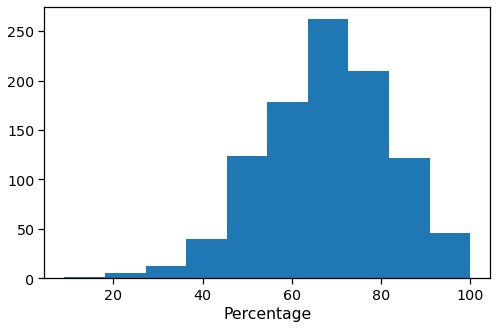

In [219]:
# start with a standard-scaled plot
histogram(students,'Percentage')

The distubition of the Percentage is unimodal, and follows a normal distrubtion with a peak in 70%.

Let's check now the distribution of different scores

### What is the distribution of reading score?

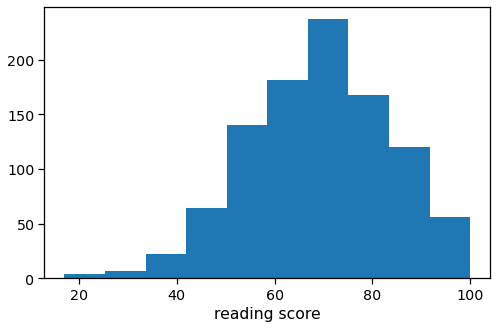

In [220]:
histogram(students,'reading score')

### What is the distribution of writing score?

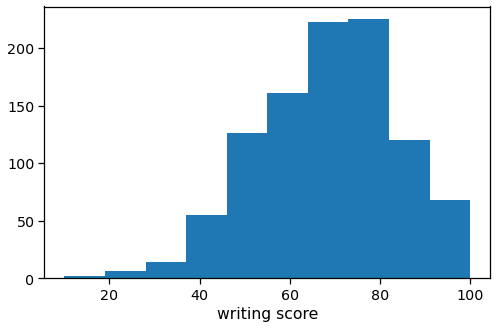

In [221]:
histogram(students,'writing score')

### What is the distribution of math score?

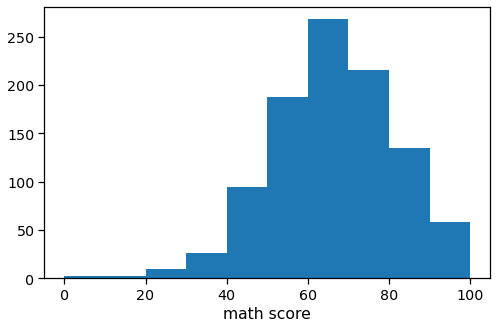

In [222]:
histogram(students,'math score')

It looks like all different scores have a normal distribution that has a peak in 70%

I'll explore next the predictor variable `test preparation course`

### How many students compted/didn't complete the preparation course?

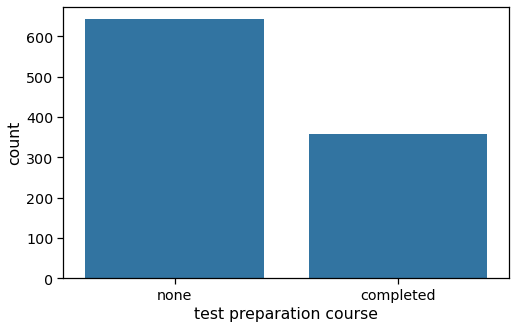

In [223]:
plt.figure(figsize=[8, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = students, x = 'test preparation course', color = default_color)
plt.show()

We can see that we have a high number of students who haven't completed the test preparation course, which doubles the number of the students who completed the test preparation course, this can have an big impact on their grades

### What's the distribution of Grade & parental level of education?

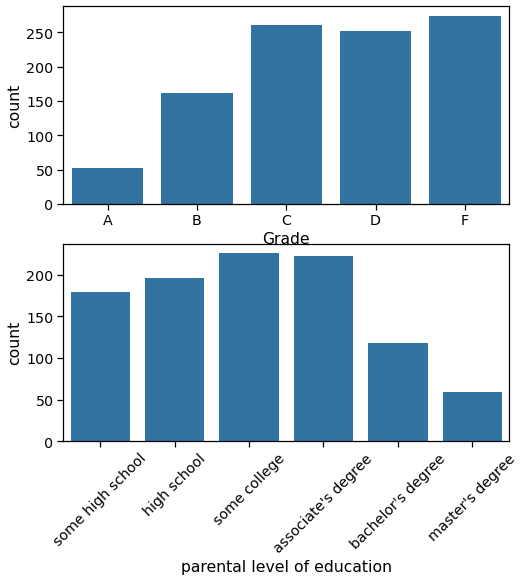

In [224]:

fig, ax = plt.subplots(nrows=2, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = students, x = 'Grade', color = default_color, ax = ax[0],order=['A','B','C','D','F'])
sb.countplot(data = students, x = 'parental level of education', color = default_color, ax = ax[1],order=['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"])
plt.xticks(rotation=45)

plt.show()

Many students seem to struggle with their grades as the count plot is higher at the end, most parents have good eduction with the majority ranging between some college studies, and an associate's degree.

I'll now keep exploring the other features for more interesting properties

In [225]:
students['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

### What's the percentage of female/male students ?

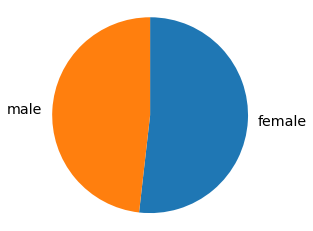

In [226]:
sorted_counts = students['gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');

The number of males and females is approximatly equal

### What's the percentage of races/ethnicities of students ?

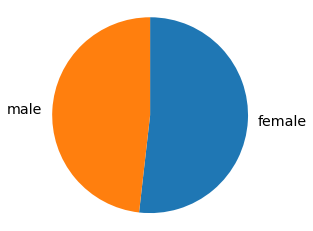

In [227]:


plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');

The students in our data sets belong to different groups thus different races and ethincities, which is a proof of diversity in our dataset

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> No transformation were necessary for the data to be explored, the distrubtion of different features followed a normal distribution

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No outliers were identified, the data is clean & tidy

In [228]:
students.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Percentage', 'Grade'],
      dtype='object')

In [229]:
numeric_vars = ['math score', 'reading score', 'writing score', 'Percentage']
categoric_vars = ['gender', 'race/ethnicity', 'parental level of education','lunch','test preparation course','Grade']

### What's the correlation between numerical variables ?

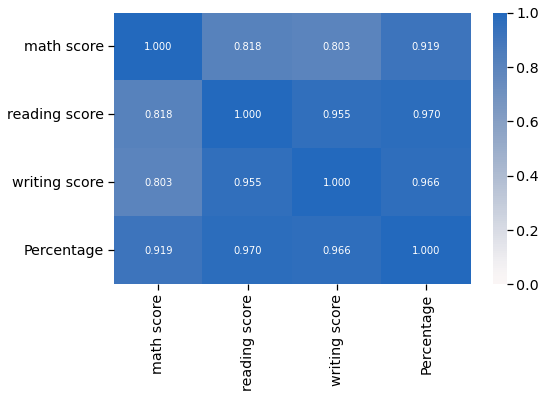

In [230]:

plt.figure(figsize = [8, 5])
sb.heatmap(students[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0,vmin=0, vmax=1)
plt.show()

students.shape= (1000, 10)


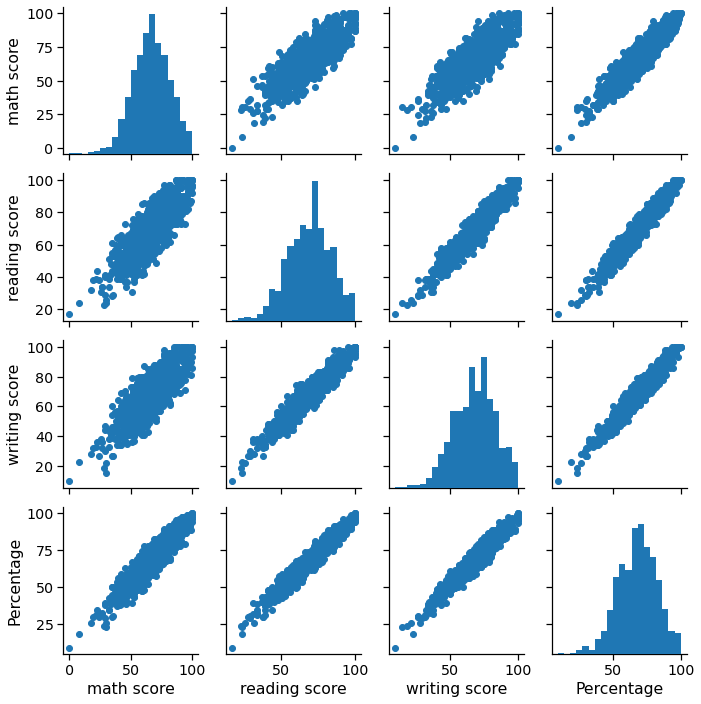

In [231]:

print("students.shape=",students.shape)


g = sb.PairGrid(data = students, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

As expected there is a strong correlation between the different scores, as students who perfom well at writing are more likely to be good at reading, this translates also in their math score, Percentage is positivly correlated with the 3 other features since it's an engineered feature. 

Let's move on to looking at how Percentage correlate with the categorical variables.

### What's the distribution of gender, race/ethnicity, parental level of education?

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1440x1440 with 0 Axes>

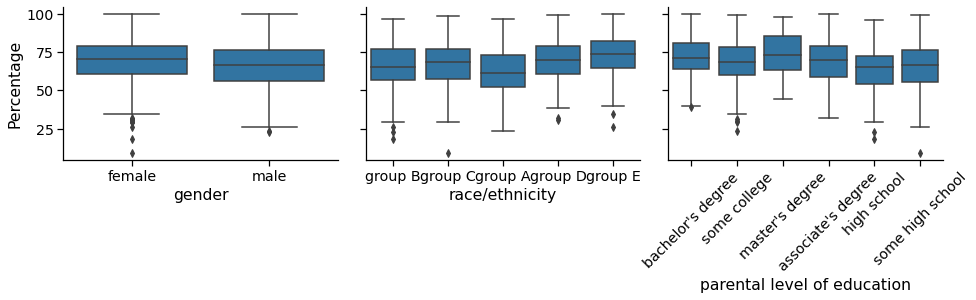

In [232]:




def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [20, 20])
g = sb.PairGrid(data = students, y_vars = ['Percentage'], x_vars = categoric_vars[:-3],
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.xticks(rotation=45)
plt.show();### What's the percentage of races/ethnicities of students ?

### What's the distribution of lunch, test preparation course, Grade?

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


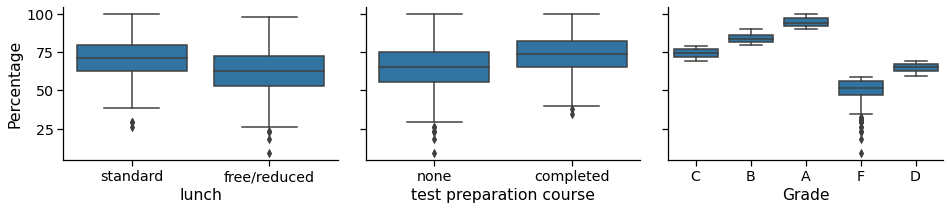

In [233]:
g = sb.PairGrid(data = students, y_vars = ['Percentage'], x_vars = categoric_vars[3:],
                size = 3, aspect = 1.5)
g.map(boxgrid)

plt.show();

Let's look at the relationship between some categorical features

### How does some categorical variables affect each other?

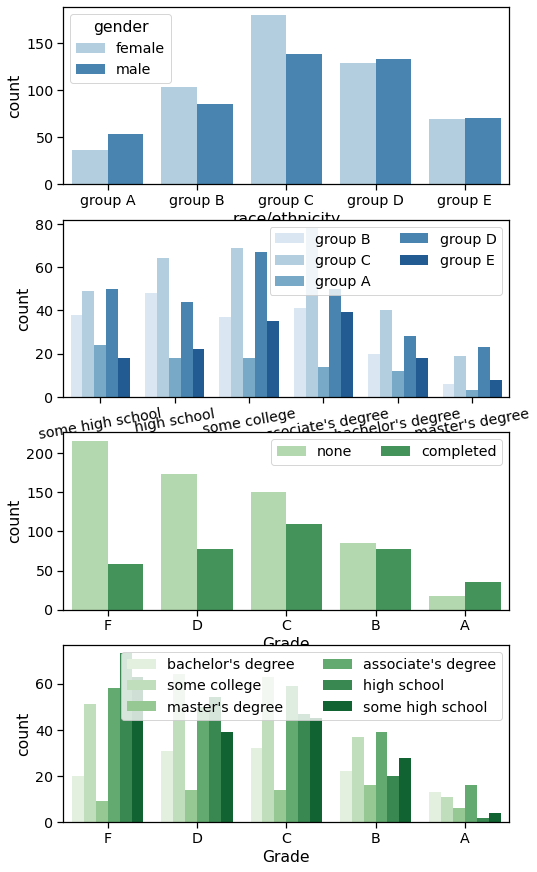

In [234]:
### What's the distribution of gender, race/ethnicity, parental level of education?
plt.figure(figsize = [8, 15])


plt.subplot(4, 1, 1)
sb.countplot(data = students, x = 'race/ethnicity', hue = 'gender', palette = 'Blues',order=['group A', 'group B', 'group C', 'group D', 'group E'])


ax = plt.subplot(4, 1, 2)
sb.countplot(data = students, x = 'parental level of education', hue = 'race/ethnicity', palette = 'Blues',order=['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"])
ax.legend(ncol = 2) 
plt.xticks(rotation=10)


ax = plt.subplot(4, 1, 3)
sb.countplot(data = students, x = 'Grade', hue = 'test preparation course', palette = 'Greens',order =  ['F', 'D', 'C', 'B', 'A'])
ax.legend(loc = 1, ncol = 2) 

ax = plt.subplot(4, 1, 4)
sb.countplot(data = students, x = 'Grade', hue = 'parental level of education', palette = 'Greens',order =  ['F', 'D', 'C', 'B', 'A'])
ax.legend(loc = 1, ncol = 2) 
plt.show()

* we notice that males and females are evenly distrubted among the different ethnicity/race groups
* the difference between races in the parental level of education is very apparent, with group C and group D having lots of parents with good educational background, on the other end group E and group A parents are low on the education level especially when it comes to the highest degrees
* Students with good grades B & C the majority didn't complete the test preparation course, however for an excellent grade A when can see that preparation made a difference
* Students who performed well, tend to have parents with good educational background, many A students have parents with bachelor's degree, associate's degree, many F students have parents with some high school level

### How does the gender affect writing, reading, math scores?

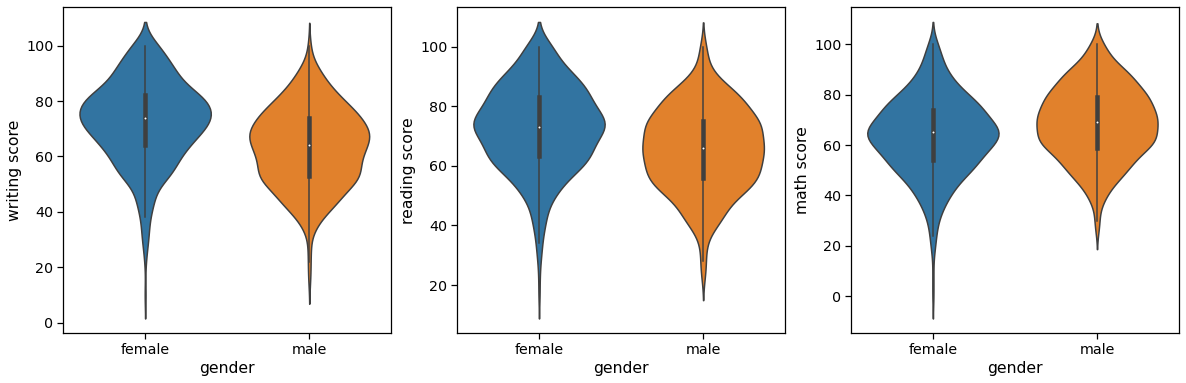

In [235]:
sb.set_context('notebook', font_scale= 1.3)
fig, ax = plt.subplots(1, 3, figsize = (20, 6))
ax1 = sb.violinplot(x = students['gender'], y = students['writing score'], ax= ax[0])### What's the distribution of gender, race/ethnicity, parental level of education?
ax1 = sb.violinplot(x = students['gender'], y = students['reading score'], ax= ax[1])
ax1 = sb.violinplot(x = students['gender'], y = students['math score'], ax= ax[2])

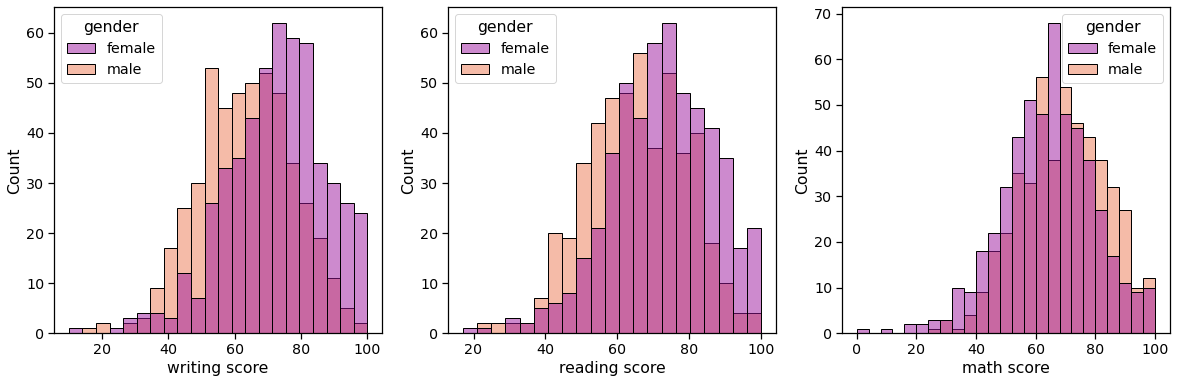

In [236]:

fig, ax = plt.subplots(1, 3, figsize = (20, 6))
ax1 = sb.histplot(x = students['writing score'], hue = students['gender'] , palette= 'plasma', ax= ax[0])
ax1 = sb.histplot(x = students['reading score'], hue = students['gender'], palette= 'plasma', ax= ax[1])
ax1 = sb.histplot(x = students['math score'], hue = students['gender'], palette= 'plasma', ax= ax[2])

* Females have higher scores in reading and writing,females tend to do better than males in both reading and writing
* Males have higher scores in math, males tend to perform better in Maths than females

### How does the parental level of education affect scores and percentages?

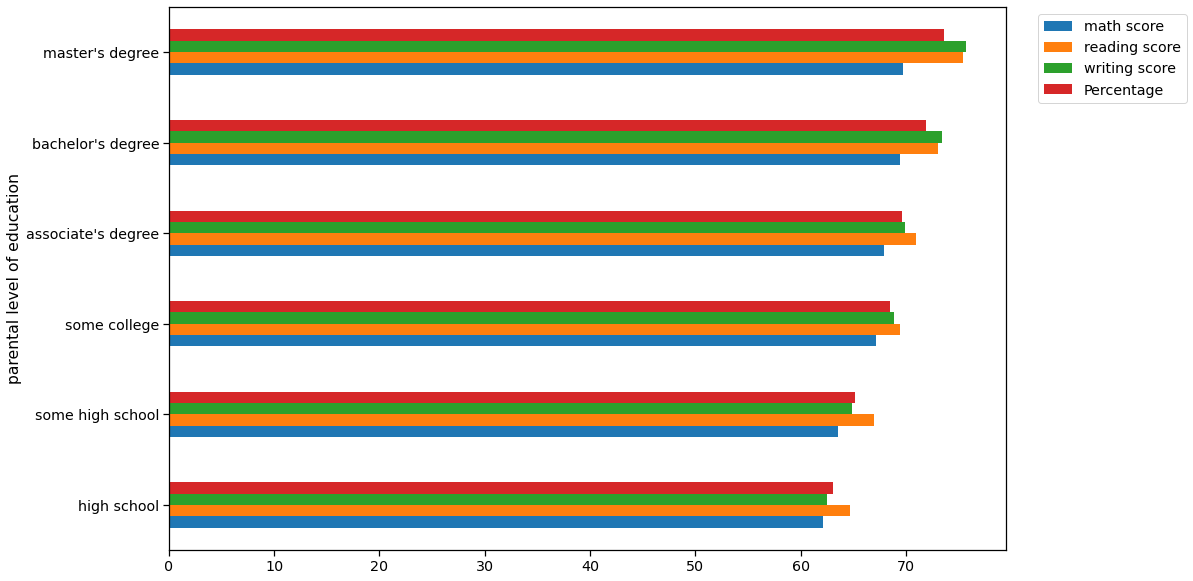

In [237]:
students.groupby('parental level of education').agg('mean').sort_values(by = 'Percentage').plot(kind='barh',figsize=(15,10))
plt.legend(bbox_to_anchor=(1.03, 1), loc = 2);

* Students whose parents never went to college seems to have the lowest percentage
* Students whose parents with a master's degree performed the best followed by parents having a bachelor's degree

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I have noticed that the test preparation course played a big role when it comes to helping students achieving excellent grades, many students with A grade completed the preparation course successfully, however for B, C students this feature didn't make a big difference, also the parents background seems to be a strong indicator of students' perfomance as students with good grades tend to have parents with higher educational background (bachelor's degree, associate's degree), besides gender also played a role in students' perfomance regarding the different subjects, the data shows that females usually perform better at reading and writing whereas male are better at math

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There seems to be a strong relationship between race/ethinicity and parents educational background, some races, group C and group D have lots of parents with good educational background, on the other end group E and group A parents are low on the education level especially when it comes to the highest degrees, this can be explained with the economical situation of the different races as some might be privileged to have the ability to access higher educations and other aren't.

## Multivariate Exploration



### How categorical features affect the Percentage?

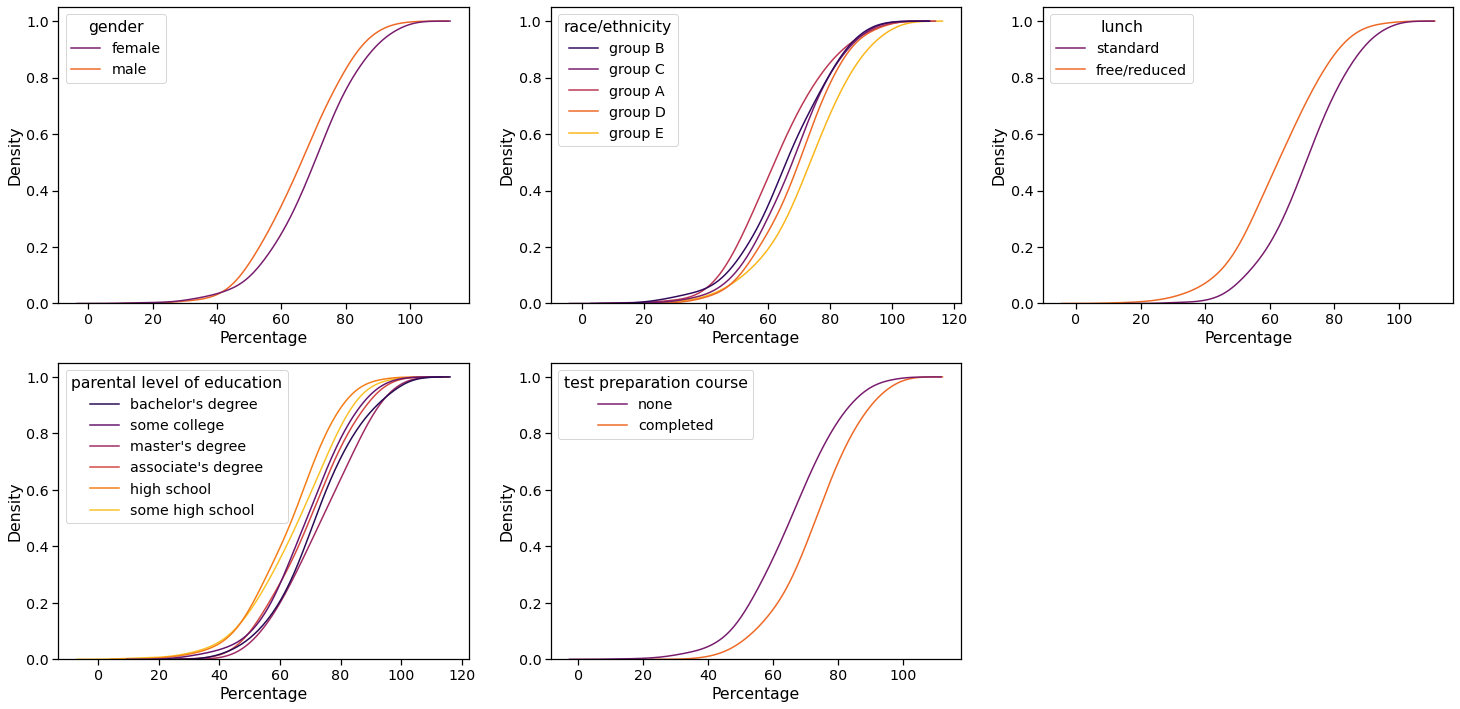

In [238]:
fig, ax = plt.subplots(2, 3, figsize = (25, 12))
ax[1, 2].axis('off')

sb.kdeplot(data = students, x = "Percentage", hue = "gender", palette = 'inferno', cumulative = True, common_norm = False, ax = ax[0, 0])
sb.kdeplot(data = students, x = "Percentage", hue = "race/ethnicity", palette = 'inferno', cumulative = True, common_norm = False, ax = ax[0, 1])
sb.kdeplot(data = students, x = "Percentage", hue = "lunch", palette = 'inferno', cumulative = True, common_norm = False, ax = ax[0, 2])
sb.kdeplot(data = students, x = "Percentage", hue = "parental level of education", palette = 'inferno', cumulative = True, common_norm = False, ax = ax[1, 0])
sb.kdeplot(data = students, x = "Percentage", hue = "test preparation course", palette = 'inferno', cumulative = True, common_norm = False, ax = ax[1, 1])

plt.show()

* Females have higher percentage than males
* Students whose parents have a master's degree have a higher percentage than others
* Students who completed their course have higher percentage as compared to those who didn't.

### How does race impact Grade and math score?

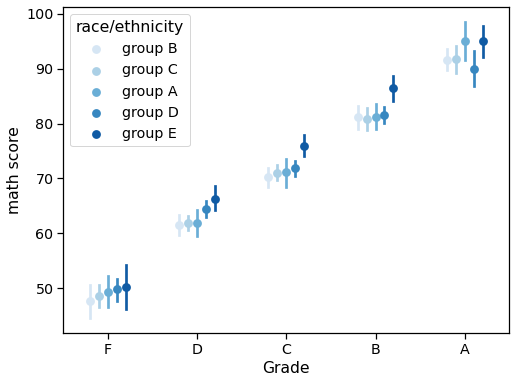

In [239]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = students, x = 'Grade', y = 'math score', hue = 'race/ethnicity',order =  ['F', 'D', 'C', 'B', 'A'],
           palette = 'Blues', linestyles = '', dodge = 0.4)

There is an slight difference between race groups when it comes to math score, group E seems to perform well across all differents grades

### How does race impact Grade and writing score?

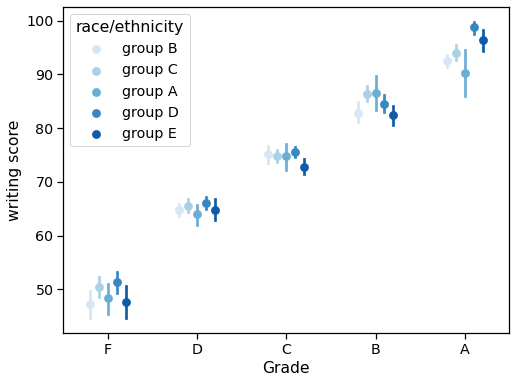

In [240]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = students, x = 'Grade', y = 'writing score', hue = 'race/ethnicity',order =  ['F', 'D', 'C', 'B', 'A'],
           palette = 'Blues', linestyles = '', dodge = 0.4)

### How does race impact Grade and reading score?

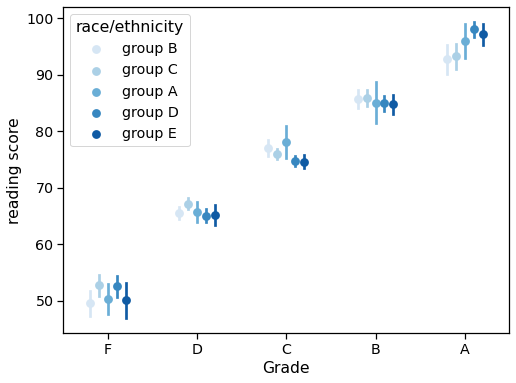

In [241]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = students, x = 'Grade', y = 'reading score', hue = 'race/ethnicity',order =  ['F', 'D', 'C', 'B', 'A'],
           palette = 'Blues', linestyles = '', dodge = 0.4)

Group D seem to perform well in reading and writing in majority of grades than other groups

### How does gender impact Grade and reading score?

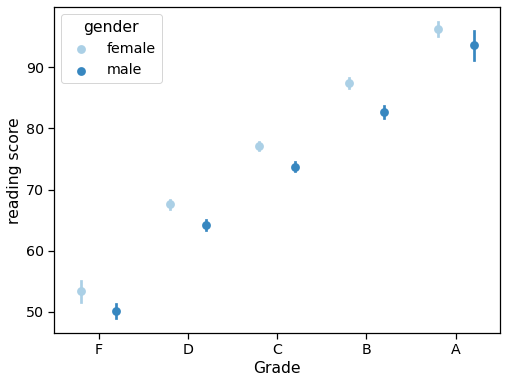

In [242]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = students, x = 'Grade', y = 'reading score', hue = 'gender',order =  ['F', 'D', 'C', 'B', 'A'],
           palette = 'Blues', linestyles = '', dodge = 0.4)

Females are better at reading scores than males

### How does gender impact Grade and math score?

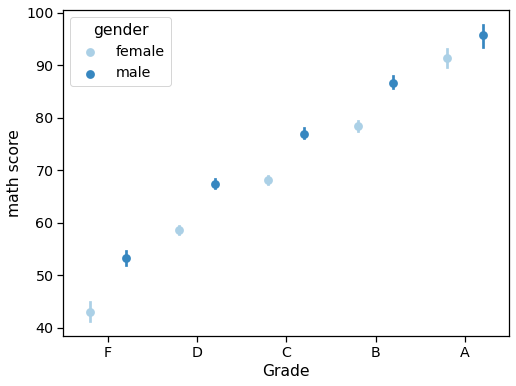

In [243]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = students, x = 'Grade', y = 'math score', hue = 'gender',order =  ['F', 'D', 'C', 'B', 'A'],
           palette = 'Blues', linestyles = '', dodge = 0.4)

Males are better at math scores than females

### How does parental level of education impact Grade and math score?

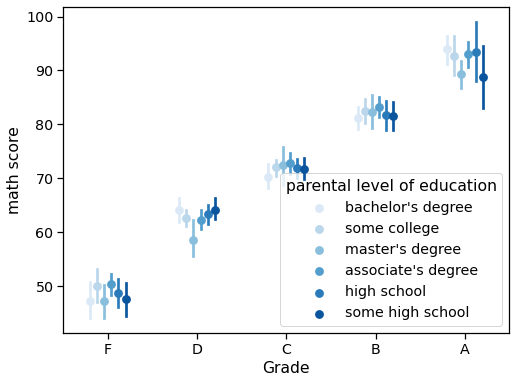

In [244]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = students, x = 'Grade', y = 'math score', hue = 'parental level of education',order =  ['F', 'D', 'C', 'B', 'A'],
           palette = 'Blues', linestyles = '', dodge = 0.4)

### How does parental level of education impact Grade and reading score?

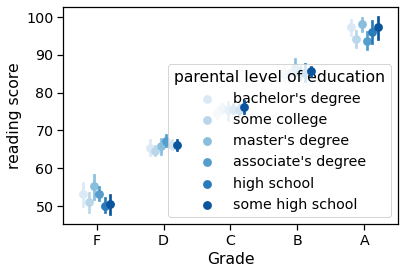

In [245]:
ax = sb.pointplot(data = students, x = 'Grade', y = 'reading score', hue = 'parental level of education',order =  ['F', 'D', 'C', 'B', 'A'],
           palette = 'Blues', linestyles = '', dodge = 0.4)

Parental level of education affect the incertainty of student's grades,  the higher the level the more likely students will have better grades

### How does test preparation course impact Grade and reading score?

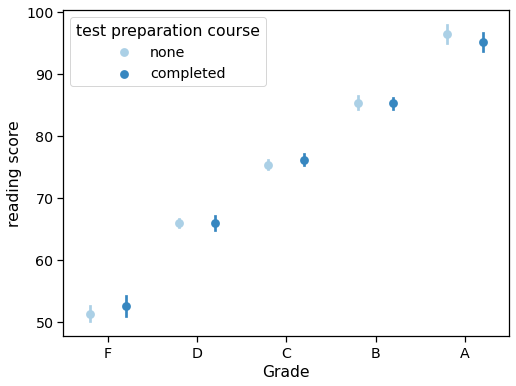

In [246]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = students, x = 'Grade', y = 'reading score', hue = 'test preparation course',order =  ['F', 'D', 'C', 'B', 'A'],
           palette = 'Blues', linestyles = '', dodge = 0.4)

### How does test preparation course impact Grade and math score?

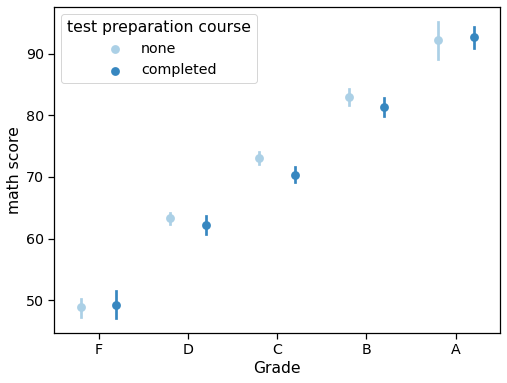

In [247]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = students, x = 'Grade', y = 'math score', hue = 'test preparation course',palette = 'Blues', linestyles = '', dodge = 0.4,order =  ['F', 'D', 'C', 'B', 'A'])

Test preparation course impacts the grades by lowering the incertainty of not having good grades for the students who completed it

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Gender plays a big role when it comes to math scores, reading and writing scores, males perform better in math across all Grades than female, and female are better when it comes to reading and writing, also race/ethnicies seems to have some impact on students grades, test preparation course seem to have an effect, in lowering the incertainty when it comes to higher grades.

### Were there any interesting or surprising interactions between features?

No surprising interactions were noticed when it comes to the features

## Conclusions



Gender seems to be the major feature when it comes to determining the students scores:
* Females perform better at reading &  writing
* Males perform better at maths
* Females have higher percentage than males

Also, Parental educational background helps determine whether a student will get good grades or not:
* Students whose parents holds a master's degree have a higher percentage than others

Finally, the preparation course, help students get higher grades

* Students who completed their course have higher percentage as compared to those who didn't.
